# Stock Price Prediction - Notebook

## This notebook shows how the functions inside the stock_predict_lib module work to get stock price predictions

## 0. Install tsfresh

In [1]:
#!pip install tsfresh

## 1. Import the module

In [2]:
import stock_predict_lib as spl

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 2. Define the variables that will be used:
  - Tickers: The tickers of the stocks whose prices want to be predicted
  - start_date: The date that will be used as lower interval for obtaining the training dataset
  - end_date: The date that will be used as upper interval for obtaining the training dataset
  - target_date: Date of prediction. At the beginning this date is merely a reference. The target_date should always be greater than the end_date. When predicting, the user can choose any date between the end_date and the target_date

In [3]:
tickers = ['AAPL', 'GOOGL', 'AMZN']

start_date = '2020-01-01'
end_date = '2021-02-01'

target_date = '2021-02-25'

## 3. Download the stock prices in the correct format using the pandas_datareader library

See spl.download_prices? (Help) for more details

In [4]:
prices = spl.download_prices(tickers, start_date, end_date)
prices.head()

,Date,Symbols,Prices
0,2020-01-02,AAPL,74.333511
3,2020-01-03,AAPL,73.610840
6,2020-01-06,AAPL,74.197395
9,2020-01-07,AAPL,73.848442
12,2020-01-08,AAPL,75.036385


## 4. Calculate rolling windows time series that will be used to extract features

In [5]:
prices_windows, prices_predict = spl.calc_prices_windows(prices, tickers, target_date, end_date = end_date)
prices_windows.head()

/content/stock_predict_lib.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux_df_1['id'] = ticker + '_' + str(i)


,Date,Symbols,Prices,id
0,2020-01-02,AAPL,74.333511,AAPL_0
1,2020-01-03,AAPL,73.610840,AAPL_0
2,2020-01-06,AAPL,74.197395,AAPL_0
3,2020-01-07,AAPL,73.848442,AAPL_0
4,2020-01-08,AAPL,75.036385,AAPL_0


In [6]:
prices_predict.head()

,id,Symbols,Price_Target
0,AAPL_0,AAPL,67.854019
1,AAPL_1,AAPL,67.814331
2,AAPL_2,AAPL,74.127892
3,AAPL_3,AAPL,71.773636
4,AAPL_4,AAPL,75.102829


## 5. Create the data preparation pipeline as well as the complete training dataset
Here, we use the tsfresh library to obtain as many time-series based features as possible. With the transformer used, we are also able to filter most of those features leaving only those that have the most potential

In [7]:
pipeline, price_target_model_df = spl.pipeline_creation(prices_windows, prices_predict)

Feature Extraction: 100%|██████████| 5/5 [01:04<00:00, 12.81s/it]
/usr/local/lib/python3.6/dist-packages/tsfresh/utilities/dataframe_functions.py:172: RuntimeWarning: The columns ['Prices__fft_coefficient__attr_"real"__coeff_16'
 'Prices__fft_coefficient__attr_"real"__coeff_17'
 'Prices__fft_coefficient__attr_"real"__coeff_18'
 'Prices__fft_coefficient__attr_"real"__coeff_19'
 'Prices__fft_coefficient__attr_"real"__coeff_20'
 'Prices__fft_coefficient__attr_"real"__coeff_21'
 'Prices__fft_coefficient__attr_"real"__coeff_22'
 'Prices__fft_coefficient__attr_"real"__coeff_23'
 'Prices__fft_coefficient__attr_"real"__coeff_24'
 'Prices__fft_coefficient__attr_"real"__coeff_25'
 'Prices__fft_coefficient__attr_"real"__coeff_26'
 'Prices__fft_coefficient__attr_"real"__coeff_27'
 'Prices__fft_coefficient__attr_"real"__coeff_28'
 'Prices__fft_coefficient__attr_"real"__coeff_29'
 'Prices__fft_coefficient__attr_"real"__coeff_30'
 'Prices__fft_coefficient__attr_"real"__coeff_31'
 'Prices__fft_coeffic

In [8]:
price_target_model_df.head()

,Prices__minimum,Prices__quantile__q_0.1,Prices__quantile__q_0.2,Prices__quantile__q_0.3,Prices__quantile__q_0.4,Prices__median,"Prices__fft_coefficient__attr_""real""__coeff_0","Prices__fft_coefficient__attr_""abs""__coeff_0",Prices__sum_values,Prices__mean,Prices__abs_energy,Prices__quantile__q_0.6,Prices__c3__lag_1,Prices__c3__lag_2,Prices__c3__lag_3,"Prices__cwt_coefficients__coeff_14__w_20__widths_(2, 5, 10, 20)","Prices__cwt_coefficients__coeff_13__w_20__widths_(2, 5, 10, 20)",Prices__quantile__q_0.7,"Prices__cwt_coefficients__coeff_12__w_20__widths_(2, 5, 10, 20)","Prices__cwt_coefficients__coeff_11__w_20__widths_(2, 5, 10, 20)","Prices__cwt_coefficients__coeff_10__w_20__widths_(2, 5, 10, 20)",Prices__quantile__q_0.8,"Prices__cwt_coefficients__coeff_9__w_20__widths_(2, 5, 10, 20)","Prices__cwt_coefficients__coeff_8__w_20__widths_(2, 5, 10, 20)","Prices__cwt_coefficients__coeff_7__w_20__widths_(2, 5, 10, 20)",Prices__maximum,"Prices__cwt_coefficients__coeff_6__w_20__widths_(2, 5, 10, 20)",Prices__quantile__q_0.9,"Prices__cwt_coefficients__coeff_5__w_20__widths_(2, 5, 10, 20)","Prices__cwt_coefficients__coeff_4__w_20__widths_(2, 5, 10, 20)","Prices__cwt_coefficients__coeff_3__w_20__widths_(2, 5, 10, 20)","Prices__cwt_coefficients__coeff_14__w_10__widths_(2, 5, 10, 20)","Prices__cwt_coefficients__coeff_2__w_20__widths_(2, 5, 10, 20)","Prices__cwt_coefficients__coeff_13__w_10__widths_(2, 5, 10, 20)","Prices__cwt_coefficients__coeff_1__w_20__widths_(2, 5, 10, 20)","Prices__cwt_coefficients__coeff_12__w_10__widths_(2, 5, 10, 20)","Prices__cwt_coefficients__coeff_0__w_20__widths_(2, 5, 10, 20)","Prices__cwt_coefficients__coeff_11__w_10__widths_(2, 5, 10, 20)","Prices__cwt_coefficients__coeff_10__w_10__widths_(2, 5, 10, 20)","Prices__cwt_coefficients__coeff_9__w_10__widths_(2, 5, 10, 20)",...,Prices__approximate_entropy__m_2__r_0.1,Prices__number_peaks__n_3,"Prices__agg_autocorrelation__f_agg_""mean""__maxlag_40","Prices__fft_coefficient__attr_""real""__coeff_3",Prices__longest_strike_above_mean,Prices__permutation_entropy__dimension_6__tau_1,Prices__fourier_entropy__bins_3,Prices__autocorrelation__lag_5,Prices__ar_coefficient__coeff_4__k_10,Prices__lempel_ziv_complexity__bins_10,"Prices__cwt_coefficients__coeff_7__w_2__widths_(2, 5, 10, 20)",Prices__fourier_entropy__bins_10,"Prices__fft_coefficient__attr_""imag""__coeff_12",Prices__index_mass_quantile__q_0.1,"Prices__change_quantiles__f_agg_""mean""__isabs_False__qh_0.4__ql_0.2",Prices__approximate_entropy__m_2__r_0.9,Prices__autocorrelation__lag_3,Prices__number_peaks__n_10,Prices__ar_coefficient__coeff_2__k_10,Prices__large_standard_deviation__r_0.25,"Prices__agg_autocorrelation__f_agg_""median""__maxlag_40",Prices__autocorrelation__lag_4,Prices__permutation_entropy__dimension_5__tau_1,Prices__permutation_entropy__dimension_4__tau_1,Prices__number_peaks__n_5,"Prices__augmented_dickey_fuller__attr_""teststat""__autolag_""AIC""","Prices__augmented_dickey_fuller__attr_""pvalue""__autolag_""AIC""",Prices__fourier_entropy__bins_2,Prices__lempel_ziv_complexity__bins_100,Prices__permutation_entropy__dimension_7__tau_1,Prices__ratio_beyond_r_sigma__r_0.5,Prices__friedrich_coefficients__coeff_2__m_3__r_30,"Prices__fft_coefficient__attr_""imag""__coeff_13",Prices__autocorrelation__lag_2,Prices__benford_correlation,Prices__ar_coefficient__coeff_5__k_10,Prices__count_above_mean,Prices__count_below_mean,Symbols,Price_Target
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AAPL_0,73.610840,74.319900,76.447575,76.751487,77.765204,78.534657,2336.673195,2336.673195,2336.673195,77.889106,182131.935892,78.820009,473739.998301,474790.636405,475374.673613,336.613673,329.449496,79.090649,321.415747,312.380911,302.440551,79.598273,291.555547,279.916962,267.565691,81.170799,254.679624,80.292322,241.155418,226.898702,212.254895,217.689358,197.432048,224.156825,182.546835,228.821416,167.424904,231.577458,232.004931,230.005124,...,0.035091,4.0,-0.500689,-5.973635,8.0

## 6. Turn the complete training dataframe into a list of dataframes. Each member of this list corresponds to a specific stock

In [9]:
df_list_X, df_list_y = spl.to_list(price_target_model_df, tickers)
df_list_X

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


[          Prices__minimum  ...  Prices__count_below_mean
 id                         ...                          
 AAPL_0          73.610840  ...                      12.0
 AAPL_1          73.610840  ...                      12.0
 AAPL_2          73.848442  ...                      11.0
 AAPL_3          73.848442  ...                      12.0
 AAPL_4          75.036385  ...                      13.0
 ...                   ...  ...                       ...
 AAPL_208       108.420654  ...                      13.0
 AAPL_209       108.420654  ...                      13.0
 AAPL_210       108.420654  ...                      12.0
 AAPL_211       108.420654  ...                      13.0
 AAPL_212       110.085289  ...                      17.0
 
 [213 rows x 268 columns],
            Prices__minimum  ...  Prices__count_below_mean
 id                          ...                          
 GOOGL_0        1361.520020  ...                      16.0
 GOOGL_1        1361.520020  ...        

In [10]:
df_list_y

[id
 AAPL_0       67.854019
 AAPL_1       67.814331
 AAPL_2       74.127892
 AAPL_3       71.773636
 AAPL_4       75.102829
                ...    
 AAPL_208    131.683228
 AAPL_209    130.764603
 AAPL_210    131.773087
 AAPL_211    136.486053
 AAPL_212    134.668762
 Name: Price_Target, Length: 213, dtype: float64, id
 GOOGL_0      1314.949951
 GOOGL_1      1339.250000
 GOOGL_2      1386.319946
 GOOGL_3      1337.719971
 GOOGL_4      1381.599976
                 ...     
 GOOGL_208    1720.219971
 GOOGL_209    1728.229980
 GOOGL_210    1734.160034
 GOOGL_211    1773.959961
 GOOGL_212    1757.760010
 Name: Price_Target, Length: 213, dtype: float64, id
 AMZN_0      1884.300049
 AMZN_1      1883.750000
 AMZN_2      1953.949951
 AMZN_3      1908.989990
 AMZN_4      1975.829956
                ...     
 AMZN_208    3206.520020
 AMZN_209    3185.270020
 AMZN_210    3172.689941
 AMZN_211    3283.959961
 AMZN_212    3322.000000
 Name: Price_Target, Length: 213, dtype: float64]

## 7. Train the Machine Learning Models Using the dataframe lists

In [11]:
model_list, test_results_list, tickers_2 = spl.train_models(df_list_X, df_list_y)

The r-squared score for your model of stock AAPL was 0.9870563957744803 on 54 values.
The r-squared score for your model of stock GOOGL was 0.9602336445896145 on 54 values.
The r-squared score for your model of stock AMZN was 0.9845819382441732 on 54 values.


## 8. Graphically see the performance of each model on the test set

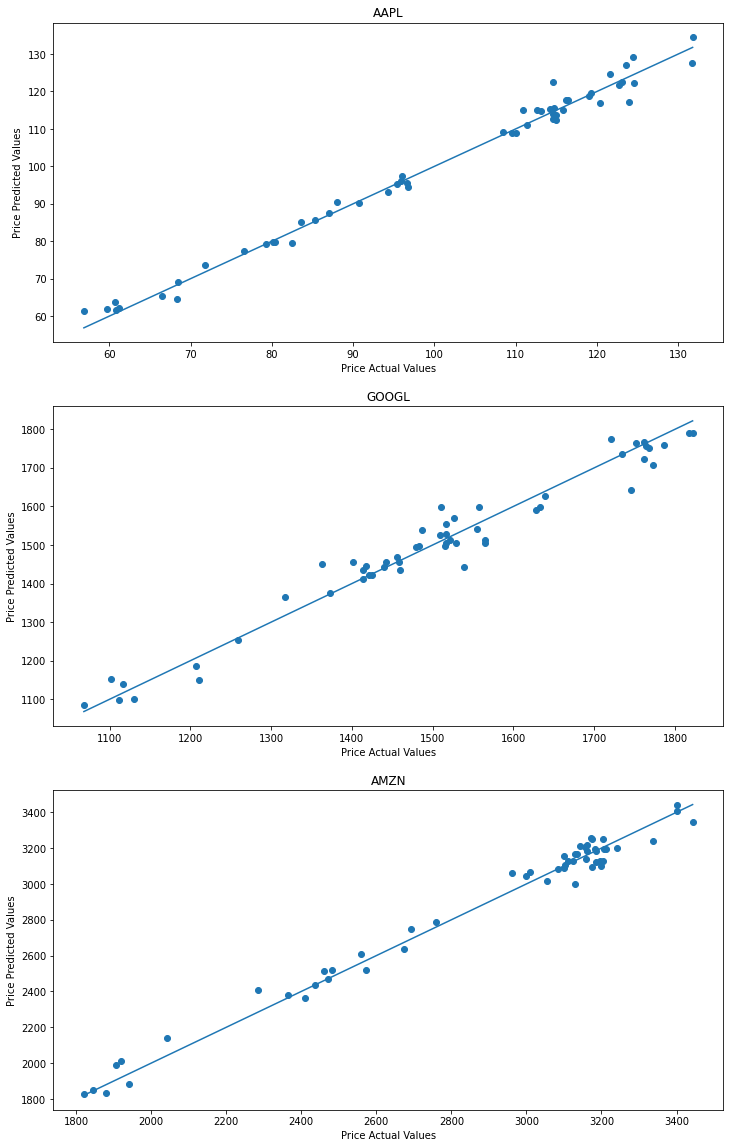

In [12]:
spl.view_performance(model_list, test_results_list, tickers_2)

## 9. Predict the price of each stock on the target_date

In [13]:
spl.price_prediction(model_list, tickers_2, pipeline, target_date)

Feature Extraction: 100%|██████████| 3/3 [00:00<00:00, 10.87it/s]


,Date,Ticker,Prediction
0,2021-02-25,AAPL,120.690165
1,2021-02-25,GOOGL,1639.949486
2,2021-02-25,AMZN,3114.623850
